<a href="https://colab.research.google.com/github/NARAYANAN0101/DEEP-LEARNING/blob/main/music_dataset_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:

# Install necessary libraries
!pip install tensorflow librosa pandas numpy scikit-learn demucs soundfile matplotlib seaborn joblib

import os
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [39]:
# Load dataset
data = pd.read_csv("music_dataset.csv")

# Separate features and labels
X = data.drop('label', axis=1).values
y = data['label'].values

# Encode labels to numbers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN (samples, timesteps, features)
X_scaled = np.expand_dims(X_scaled, axis=2)


In [40]:
# Simple Data Augmentation: Adding noise
def augment_data(features, labels, num_augmentations=5):
    augmented_features = []
    augmented_labels = []
    for _ in range(num_augmentations):
        noise = np.random.normal(0, 0.1, features.shape)
        augmented_features.append(features + noise)
        augmented_labels.append(labels)
    return np.concatenate([features] + augmented_features), np.concatenate([labels] + augmented_labels)

X_augmented, y_augmented = augment_data(X_scaled, y_categorical, num_augmentations=10)

print(f"Original data shape: {X_scaled.shape}")
print(f"Augmented data shape: {X_augmented.shape}")

Original data shape: (17, 20, 1)
Augmented data shape: (187, 20, 1)


### Artificial Neural Network (ANN) Model

In [41]:
# Define the ANN model
model_ann = Sequential([
    Flatten(input_shape=(X_augmented.shape[1], X_augmented.shape[2])), # Flatten the input for the ANN
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_augmented.shape[1], activation='softmax')
])

# Compile the ANN model
model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model_ann.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │         2,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,334 (44.27 KB)

 Trainable params: 11,334 (44.27 KB)

 Non-trainable params: 0 (0.00 B)

### Train the ANN Model

In [42]:
# Train the ANN model
history_ann = model_ann.fit(
    X_train_aug, y_train_aug,
    epochs=50, # Increased epochs for ANN
    batch_size=16,
    validation_data=(X_test_aug, y_test_aug)
)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.2423 - loss: 1.7839 - val_accuracy: 0.5526 - val_loss: 1.3964
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4160 - loss: 1.4889 - val_accuracy: 0.6842 - val_loss: 1.1989
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6279 - loss: 1.1448 - val_accuracy: 0.7632 - val_loss: 1.0378
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7028 - loss: 0.9623 - val_accuracy: 0.8158 - val_loss: 0.9043
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7852 - loss: 0.7731 - val_accuracy: 0.7368 - val_loss: 0.7926
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7881 - loss: 0.6714 - val_accuracy: 0.7368 - val_loss: 0.6889
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8684 - loss: 0.6019 - val_accuracy: 0.7368 - val_loss: 0.6038
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7745 - loss: 0.6022 - val_accuracy: 0.7368 - v

### Evaluate and Visualize ANN Model Performance

✅ Final Test Accuracy (ANN with Augmented Data): 73.68%


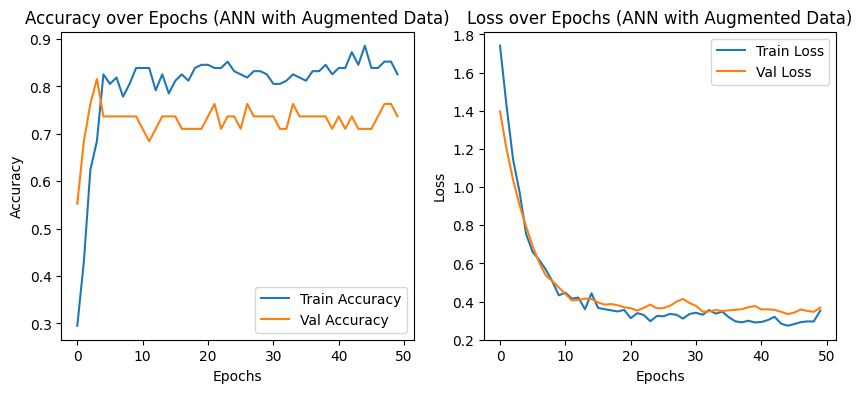

In [43]:
# Evaluate ANN model on test data
test_loss_ann, test_acc_ann = model_ann.evaluate(X_test_aug, y_test_aug, verbose=0)
print(f"✅ Final Test Accuracy (ANN with Augmented Data): {test_acc_ann * 100:.2f}%")

# Plot training history for ANN
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_ann.history['accuracy'], label='Train Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs (ANN with Augmented Data)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_ann.history['loss'], label='Train Loss')
plt.plot(history_ann.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs (ANN with Augmented Data)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Confusion Matrix and Classification Report for ANN

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


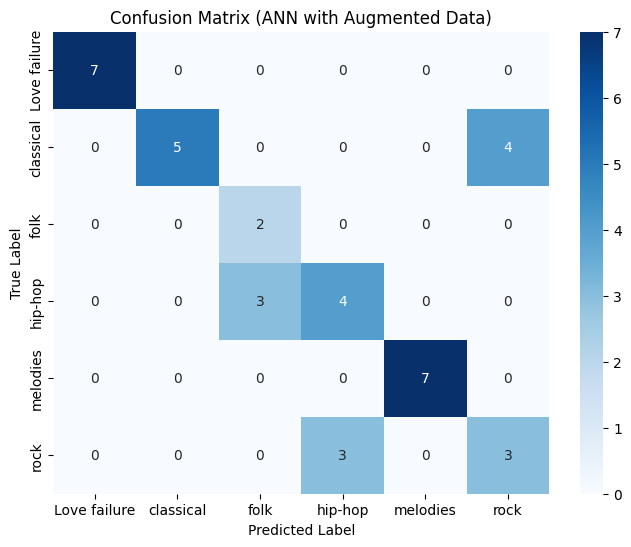


Classification Report (ANN with Augmented Data):
              precision    recall  f1-score   support

Love failure       1.00      1.00      1.00         7
   classical       1.00      0.56      0.71         9
        folk       0.40      1.00      0.57         2
     hip-hop       0.57      0.57      0.57         7
    melodies       1.00      1.00      1.00         7
        rock       0.43      0.50      0.46         6

    accuracy                           0.74        38
   macro avg       0.73      0.77      0.72        38
weighted avg       0.80      0.74      0.75        38



In [44]:
# Predict probabilities on the test set (ANN)
y_pred_prob_ann = model_ann.predict(X_test_aug)

# Convert predicted probabilities to class labels (ANN)
y_pred_ann = np.argmax(y_pred_prob_ann, axis=1)
y_true_ann = np.argmax(y_test_aug, axis=1)

# Generate confusion matrix (ANN)
cm_ann = confusion_matrix(y_true_ann, y_pred_ann)

# Plot confusion matrix (ANN)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (ANN with Augmented Data)')
plt.show()

# Generate classification report (ANN)
print("\nClassification Report (ANN with Augmented Data):")
print(classification_report(y_true_ann, y_pred_ann, target_names=encoder.classes_))

In [46]:
# Evaluate model on test data
test_loss_aug, test_acc_aug = model_aug.evaluate(X_test_aug, y_test_aug, verbose=0)
print(f"✅ Final Test Accuracy (Augmented Data): {test_acc_aug * 100:.2f}%")

✅ Final Test Accuracy (Augmented Data): 73.68%
